<a href="https://colab.research.google.com/github/anjali-ojha/deep-learning/blob/main/assignment/assignment-4/part2/Anjali_Ojha_HW_4_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github - https://github.com/anjali-ojha/deep-learning/blob/main/assignment/assignment-4/part2/Anjali_Ojha_HW_4_Part2.ipynb

# Assignment 04 - Transfer Learning and Bounding Boxes and YOLOV8

# Part 2: Follow the steps in YOLOV8 and attach a screenshot of object detection

## Mac: https://pysource.com/2023/03/28/object-detection-with-yolo-v8-on-mac-m1/ buttery fly dataset: use ~10 images from https://universe.roboflow.com/yolo-a6y21/squid-bat-butterfly

## You can also try butterfly video and detect objects. (do not submit it)

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy
import cv2

from IPython.display import display
from IPython.display import Image as im

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
def detect_objects(_model, image_path, conf):
    """
    This method will load the image and detect the
    """
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)
    results = _model.predict(source=image_path, conf=conf)
    result = results[0]
    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")

    print(bboxes, classes)

    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str(cls), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    image2 = Image.fromarray(frame_rgb)
    plt.figure(figsize=(8,32))
    plt.imshow(image2)
    plt.show()


In [ ]:
# Load Test Image for quick validation
! rm dog.jpeg*
! wget https://media.roboflow.com/notebooks/examples/dog.jpeg

--2024-02-29 05:00:49--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>] 103.57K  --.-KB/s    in 0.001s  

2024-02-29 05:00:49 (78.9 MB/s) - ‘dog.jpeg’ saved [106055/106055]




image 1/1 /content/dog.jpeg: 640x384 1 dog, 1624.2ms
Speed: 2.4ms preprocess, 1624.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)
[[ 68 249 644 929]] [16]


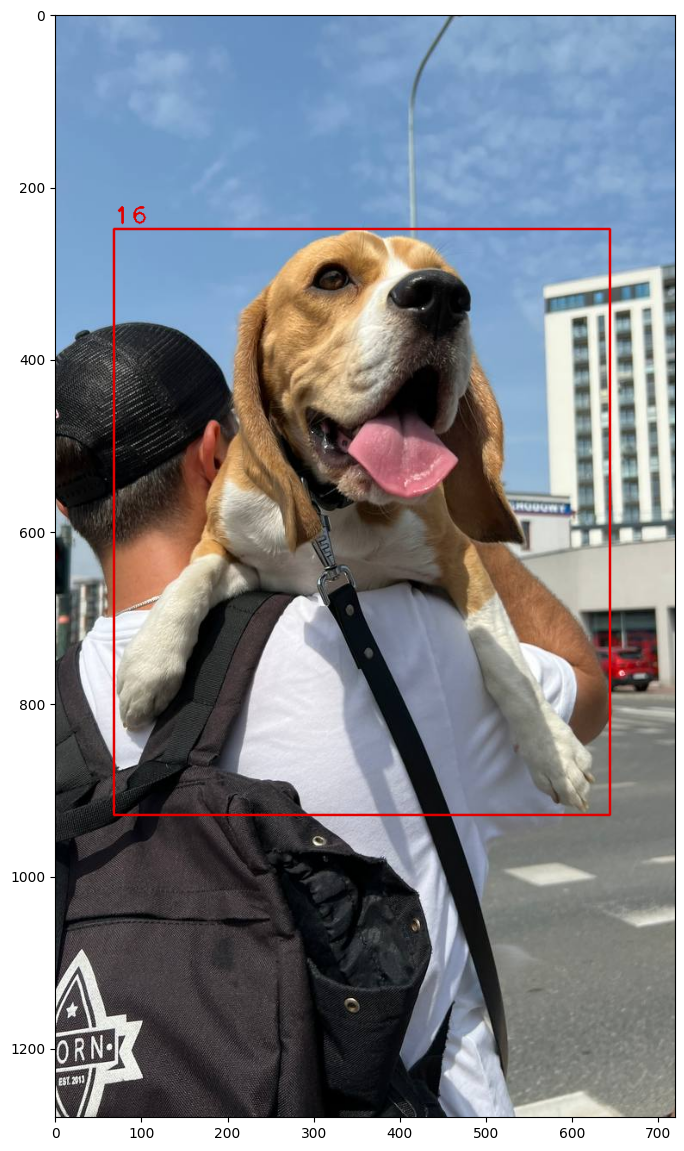

In [ ]:
# Loading the ylolv8m model and testing it on a sample image.
model = YOLO("yolov8m.pt")
detect_objects(model, 'dog.jpeg', conf=0.75)

## Loading the sample dataset which created from the source https://universe.roboflow.com/yolo-a6y21/squid-bat-butterfly

### Took the entire dataset and split it in test and validatiion. It consist of multiple images of Bats, Butterfly and Squid.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Loading Data From Git which was prepared from the given link

! rm -r butterfly-mix* __MAC*
! ls -lrth
! wget https://github.com/anjali-ojha/deep-learning/raw/main/assignment/assignment-4/part2/butterfly-mix.zip
! unzip butterfly-mix.zip
! ls -lrth

total 57M
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg
drwxr-xr-x 1 root root 4.0K Feb 27 14:34 sample_data
-rw-r--r-- 1 root root  50M Feb 29 03:34 yolov8m.pt
-rw-r--r-- 1 root root 6.3M Feb 29 03:35 yolov8n.pt
drwxr-xr-x 2 root root 4.0K Feb 29 04:59 runs
--2024-02-29 05:00:56--  https://github.com/anjali-ojha/deep-learning/raw/main/assignment/assignment-4/part2/butterfly-mix.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/anjali-ojha/deep-learning/main/assignment/assignment-4/part2/butterfly-mix.zip [following]
--2024-02-29 05:00:56--  https://raw.githubusercontent.com/anjali-ojha/deep-learning/main/assignment/assignment-4/part2/butterfly-mix.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (

In [ ]:
! rm -rf runs/*

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# load a pretrained YOLOv8n model, where n represents nano which is smaller.

new_model = YOLO('yolov8n.pt')

train_result = new_model.train(data = f'{HOME}/butterfly-mix/datasets/data.yaml',
                               epochs=25)


Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/butterfly-mix/datasets/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning /content/butterfly-mix/datasets/train/labels... 86 images, 0 backgrounds, 0 corrupt: 100%|██████████| 86/86 [00:00<00:00, 1467.46it/s]

train: New cache created: /content/butterfly-mix/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/butterfly-mix/datasets/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 2183.85it/s]

val: New cache created: /content/butterfly-mix/datasets/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.225      3.186      1.664         23        640: 100%|██████████| 6/6 [01:21<00:00, 13.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]

                   all         10         10    0.00333          1      0.164      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G       1.04      2.873      1.507         22        640: 100%|██████████| 6/6 [01:03<00:00, 10.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]

                   all         10         10    0.00355          1      0.599      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      1.056      2.469       1.51         22        640: 100%|██████████| 6/6 [01:09<00:00, 11.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all         10         10    0.00432          1      0.613      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.012      2.152      1.478         24        640: 100%|██████████| 6/6 [01:01<00:00, 10.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]

                   all         10         10    0.00415          1      0.483      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G     0.9749      2.054      1.485         23        640: 100%|██████████| 6/6 [01:00<00:00, 10.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]

                   all         10         10     0.0039          1      0.715      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      1.152      2.018      1.575         14        640: 100%|██████████| 6/6 [01:00<00:00, 10.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

                   all         10         10      0.964      0.368      0.838      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      1.028      1.794      1.448         15        640: 100%|██████████| 6/6 [01:00<00:00, 10.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]

                   all         10         10      0.716      0.713       0.89      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G     0.9502      1.685      1.412         14        640: 100%|██████████| 6/6 [01:04<00:00, 10.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

                   all         10         10       0.73      0.611      0.753       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G     0.9887      1.708      1.467         15        640: 100%|██████████| 6/6 [01:06<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

                   all         10         10      0.731        0.5       0.81      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G     0.9703      1.663      1.458         16        640: 100%|██████████| 6/6 [01:01<00:00, 10.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

                   all         10         10      0.955      0.685      0.882      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G     0.8449      1.496      1.338         22        640: 100%|██████████| 6/6 [01:00<00:00, 10.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]

                   all         10         10      0.901      0.773      0.915      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G     0.9237      1.436      1.394         15        640: 100%|██████████| 6/6 [01:00<00:00, 10.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]

                   all         10         10      0.623      0.847      0.934      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G       0.83      1.414       1.33         13        640: 100%|██████████| 6/6 [01:00<00:00, 10.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]

                   all         10         10      0.797      0.667      0.849      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G     0.8601      1.322      1.344         17        640: 100%|██████████| 6/6 [01:01<00:00, 10.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]

                   all         10         10      0.795      0.667      0.824      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G     0.9111      1.373      1.342         26        640: 100%|██████████| 6/6 [01:09<00:00, 11.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all         10         10      0.631      0.889      0.875      0.645


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G     0.7866      1.701      1.363          9        640: 100%|██████████| 6/6 [01:10<00:00, 11.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]

                   all         10         10      0.699      0.807      0.857      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G     0.8126      1.715      1.361          6        640: 100%|██████████| 6/6 [01:05<00:00, 10.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.32s/it]

                   all         10         10      0.758      0.917      0.946      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G     0.7771      1.592       1.36         10        640: 100%|██████████| 6/6 [01:01<00:00, 10.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all         10         10      0.891      0.917      0.978      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G     0.6575      1.486      1.317          9        640: 100%|██████████| 6/6 [01:00<00:00, 10.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]

                   all         10         10      0.855          1      0.995      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G     0.7151      1.508       1.29          6        640: 100%|██████████| 6/6 [01:00<00:00, 10.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]

                   all         10         10       0.93          1      0.995      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G      0.675      1.408      1.306          6        640: 100%|██████████| 6/6 [01:00<00:00, 10.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]

                   all         10         10      0.912          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G     0.6409      1.388      1.268         10        640: 100%|██████████| 6/6 [01:00<00:00, 10.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]

                   all         10         10      0.989          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G      0.628      1.322      1.253          6        640: 100%|██████████| 6/6 [01:01<00:00, 10.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.32s/it]

                   all         10         10      0.981      0.998      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G     0.5906      1.269      1.195          9        640: 100%|██████████| 6/6 [01:01<00:00, 10.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]

                   all         10         10       0.96      0.988      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G     0.5846      1.301      1.196          7        640: 100%|██████████| 6/6 [00:59<00:00,  9.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]

                   all         10         10      0.958      0.991      0.995      0.833



25 epochs completed in 0.463 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


                   all         10         10      0.958      0.991      0.995      0.833
                   Bat         10          3      0.945          1      0.995      0.813
             Butterfly         10          4          1      0.974      0.995      0.746
                 Squid         10          3       0.93          1      0.995       0.94
Speed: 2.3ms preprocess, 197.3ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train


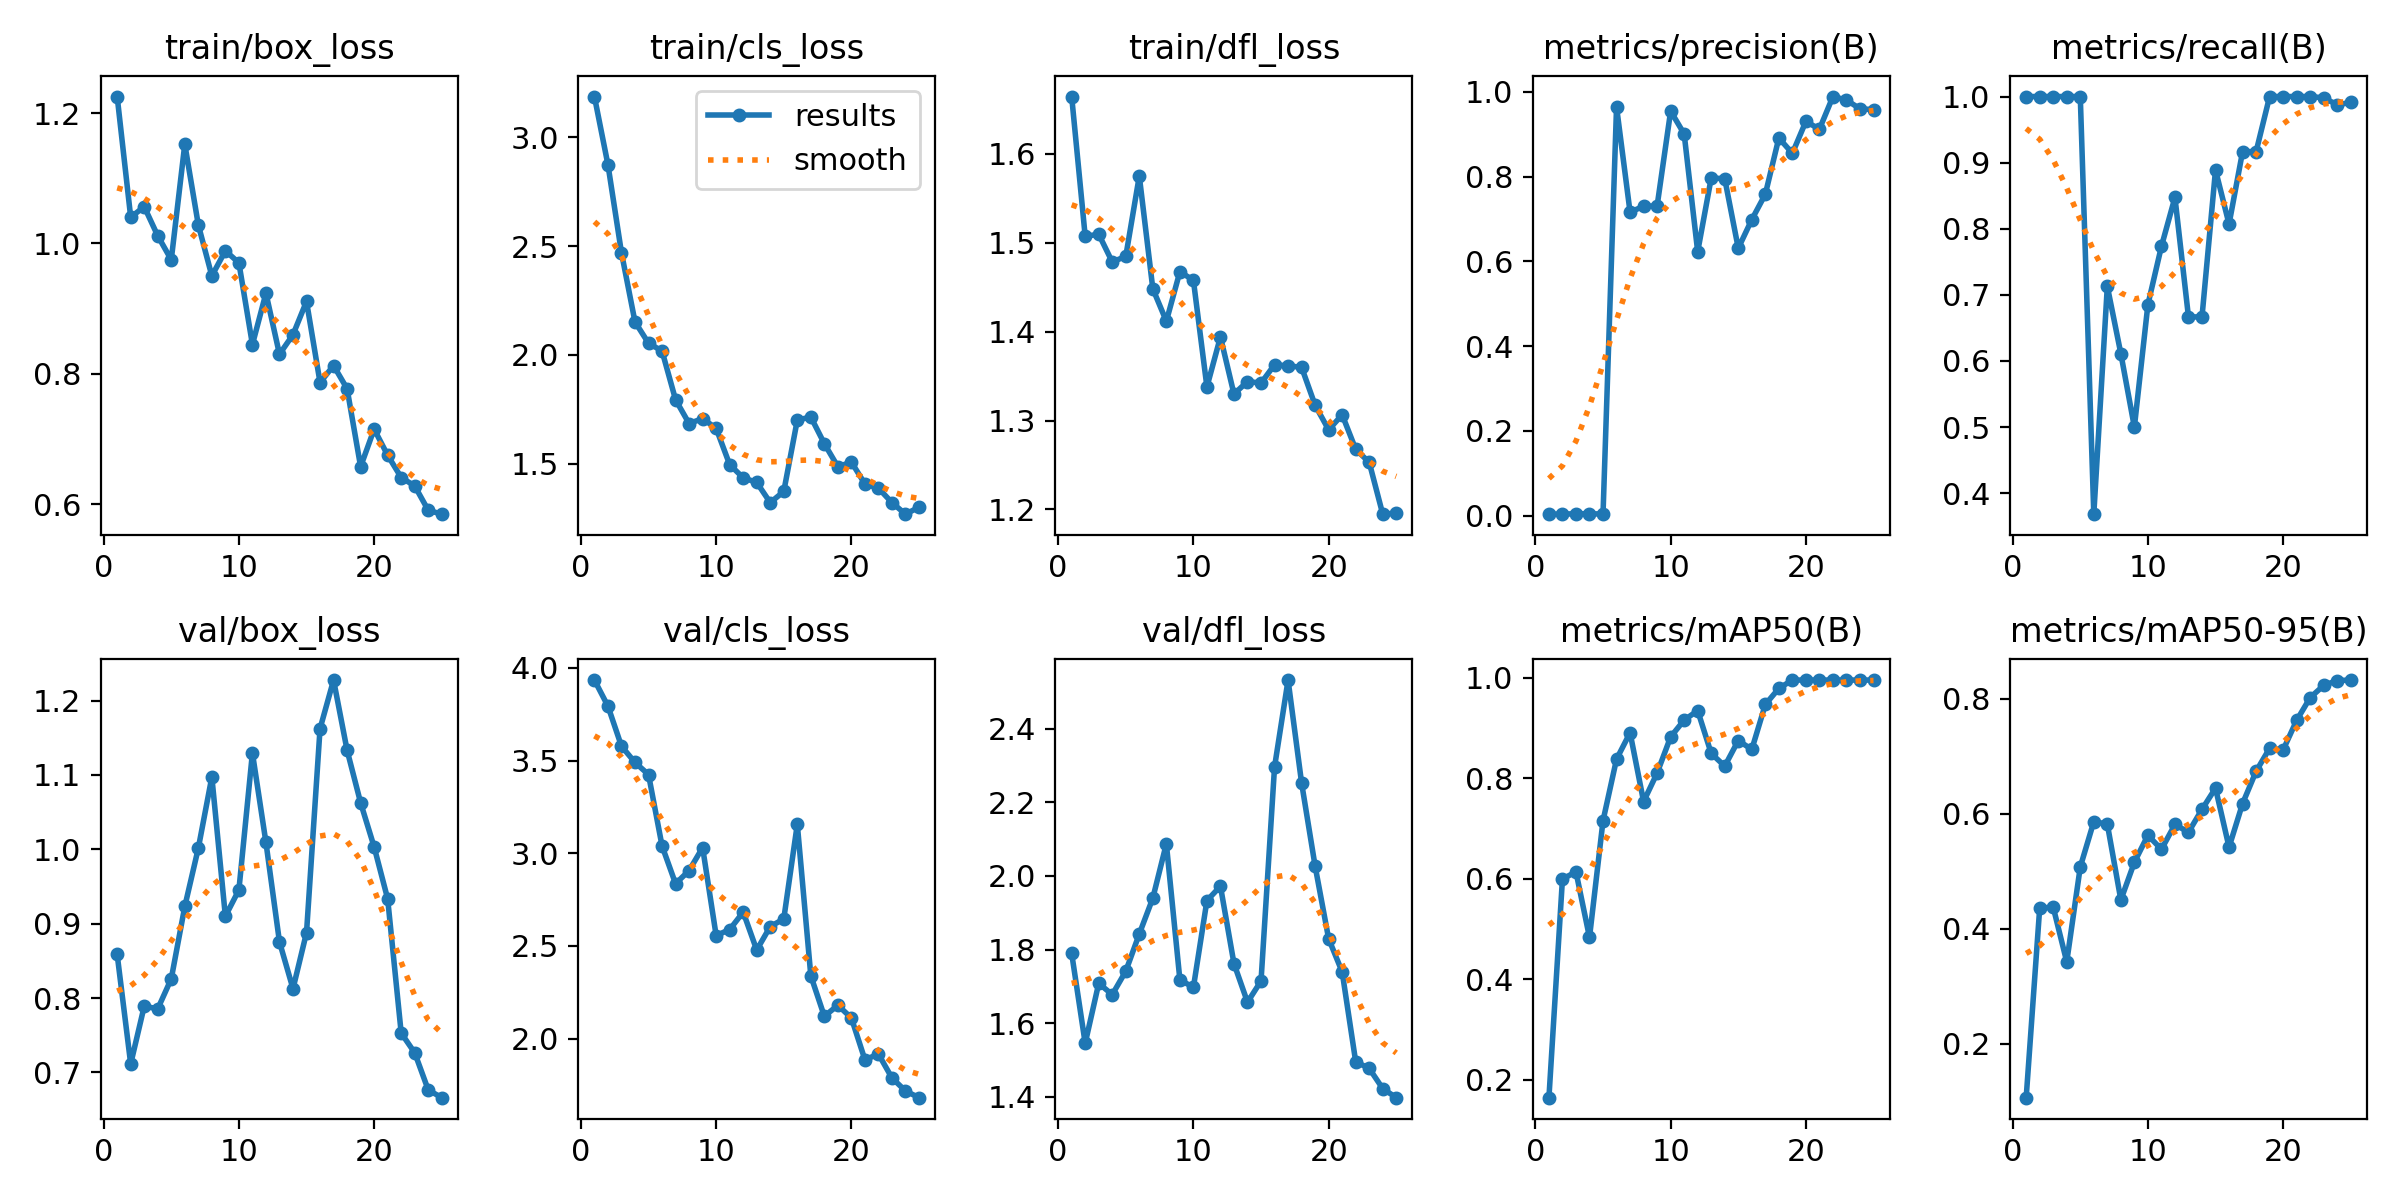

In [ ]:
# Loading the Trainign statistics
im(filename='runs/detect/train/results.png', width=900)

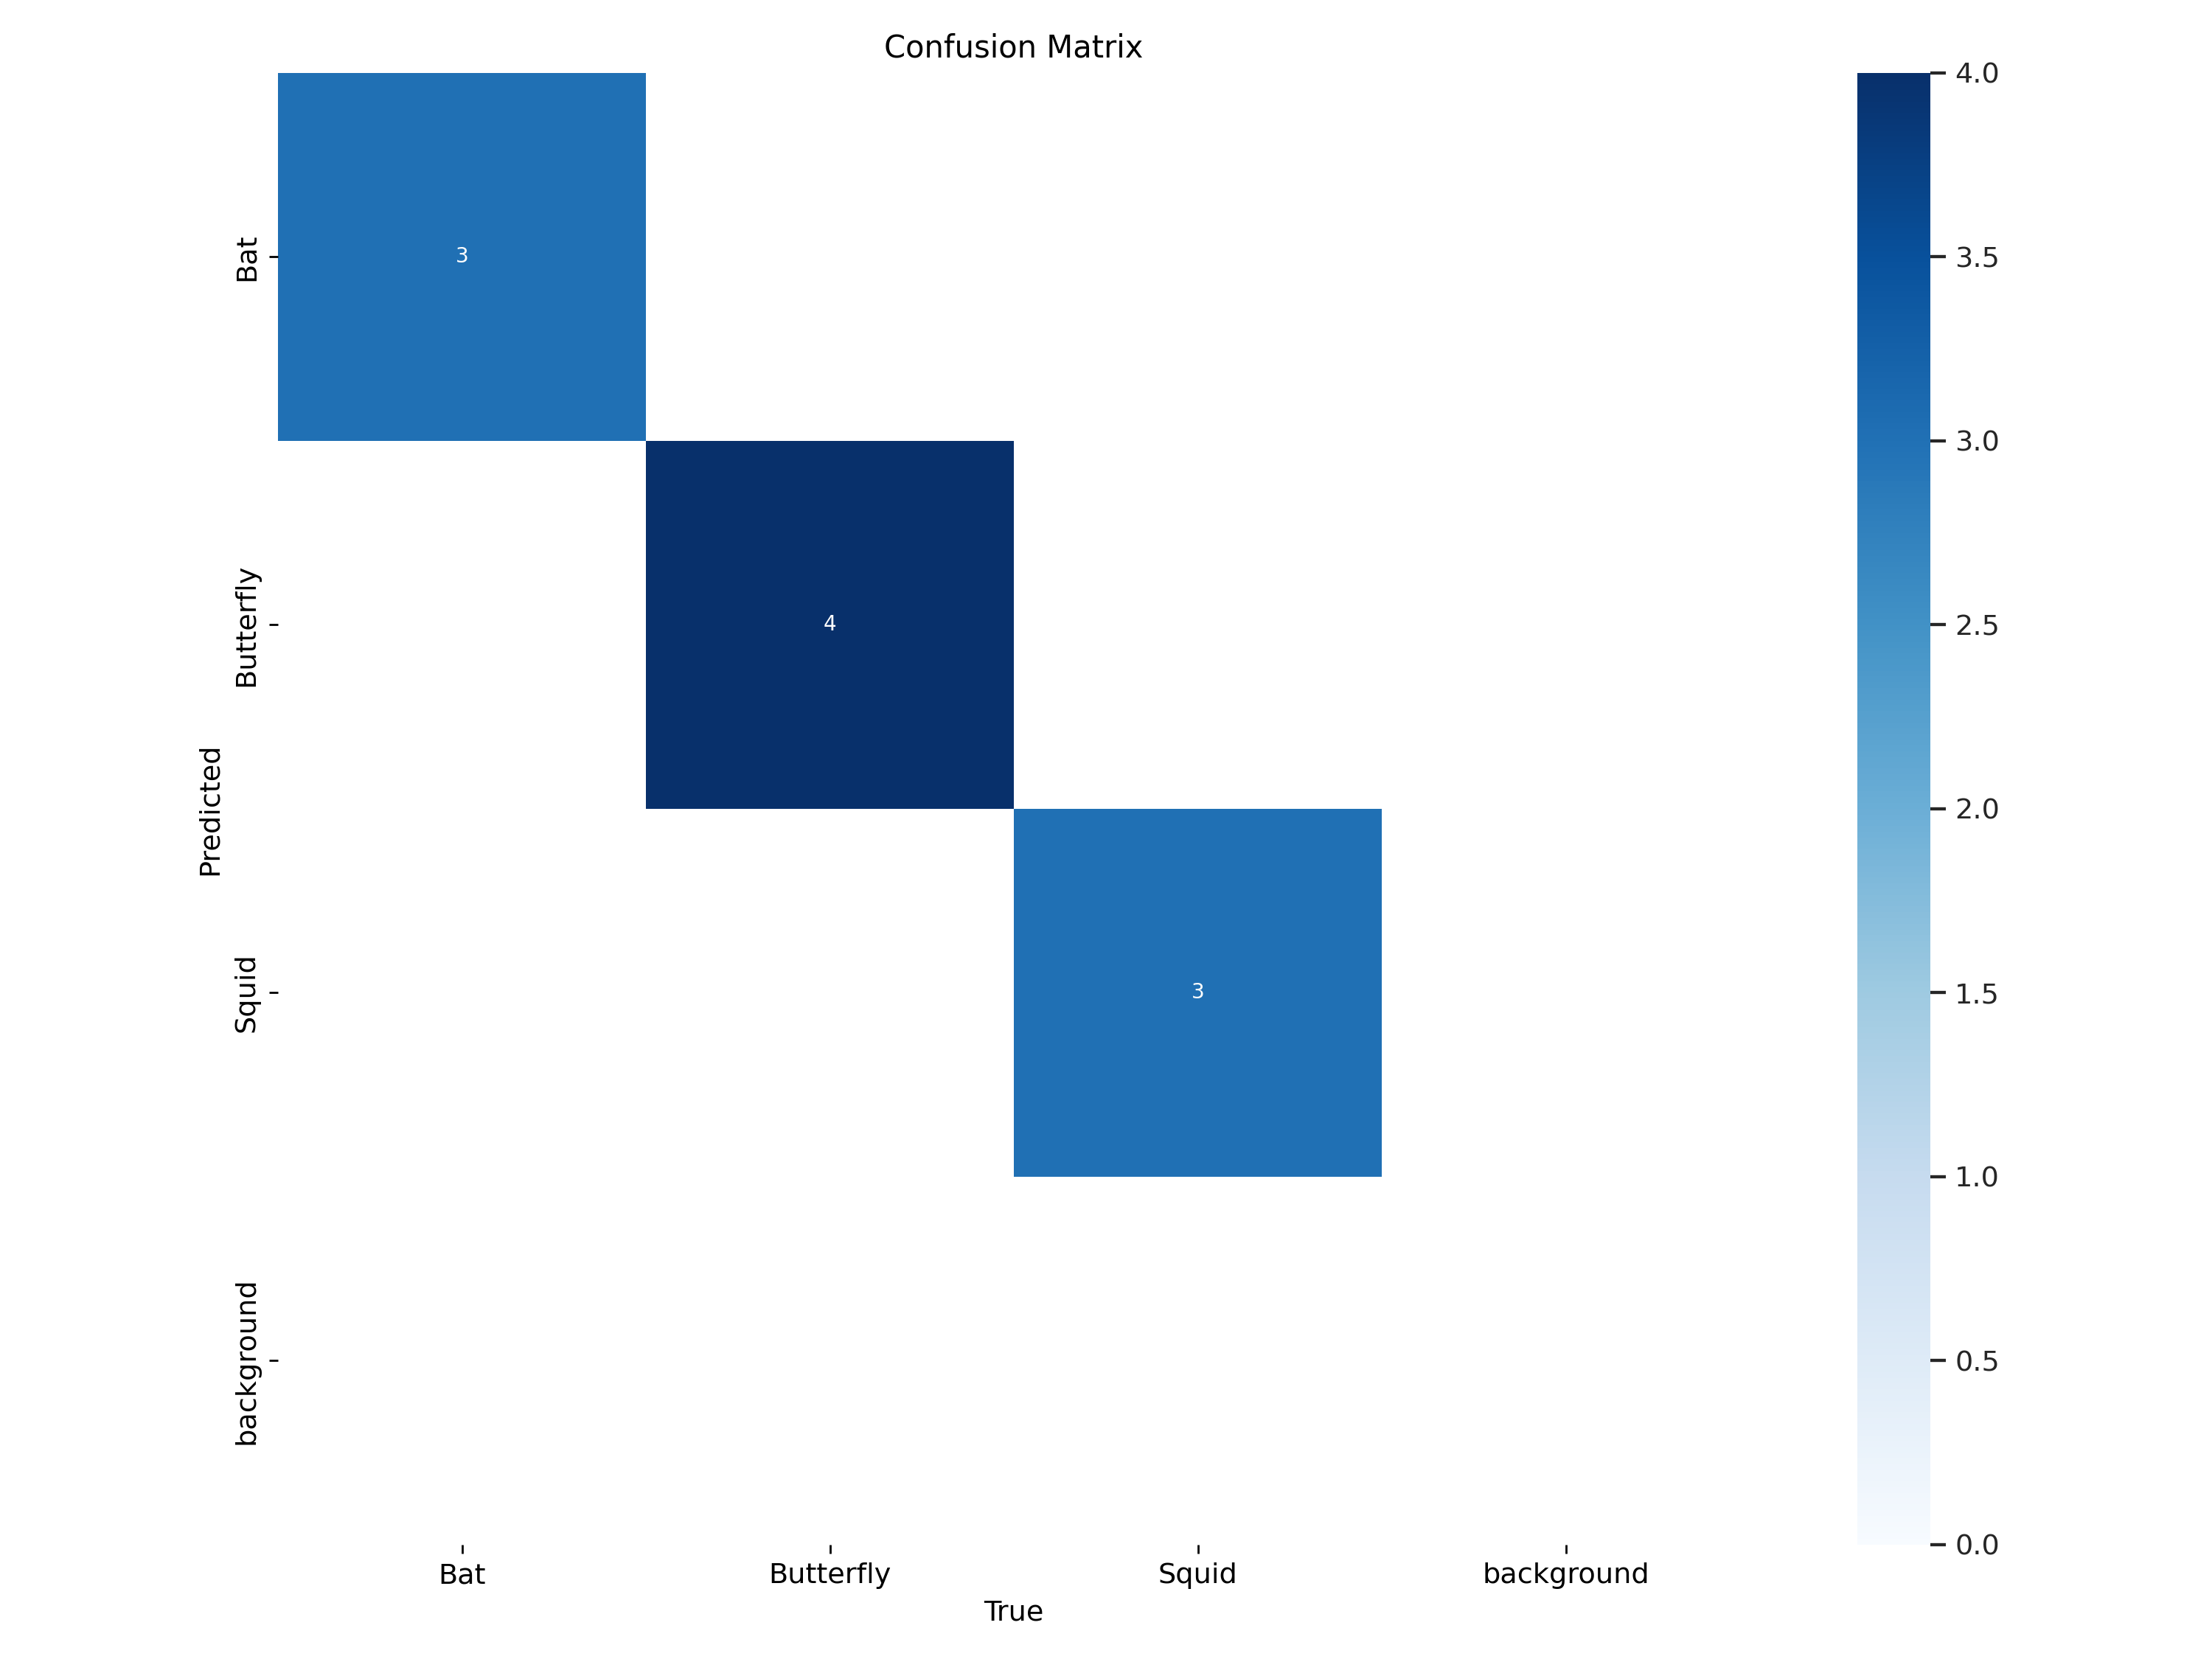

In [ ]:
# Loading the Trainign statistics
im(filename='runs/detect/train/confusion_matrix.png', width=600)

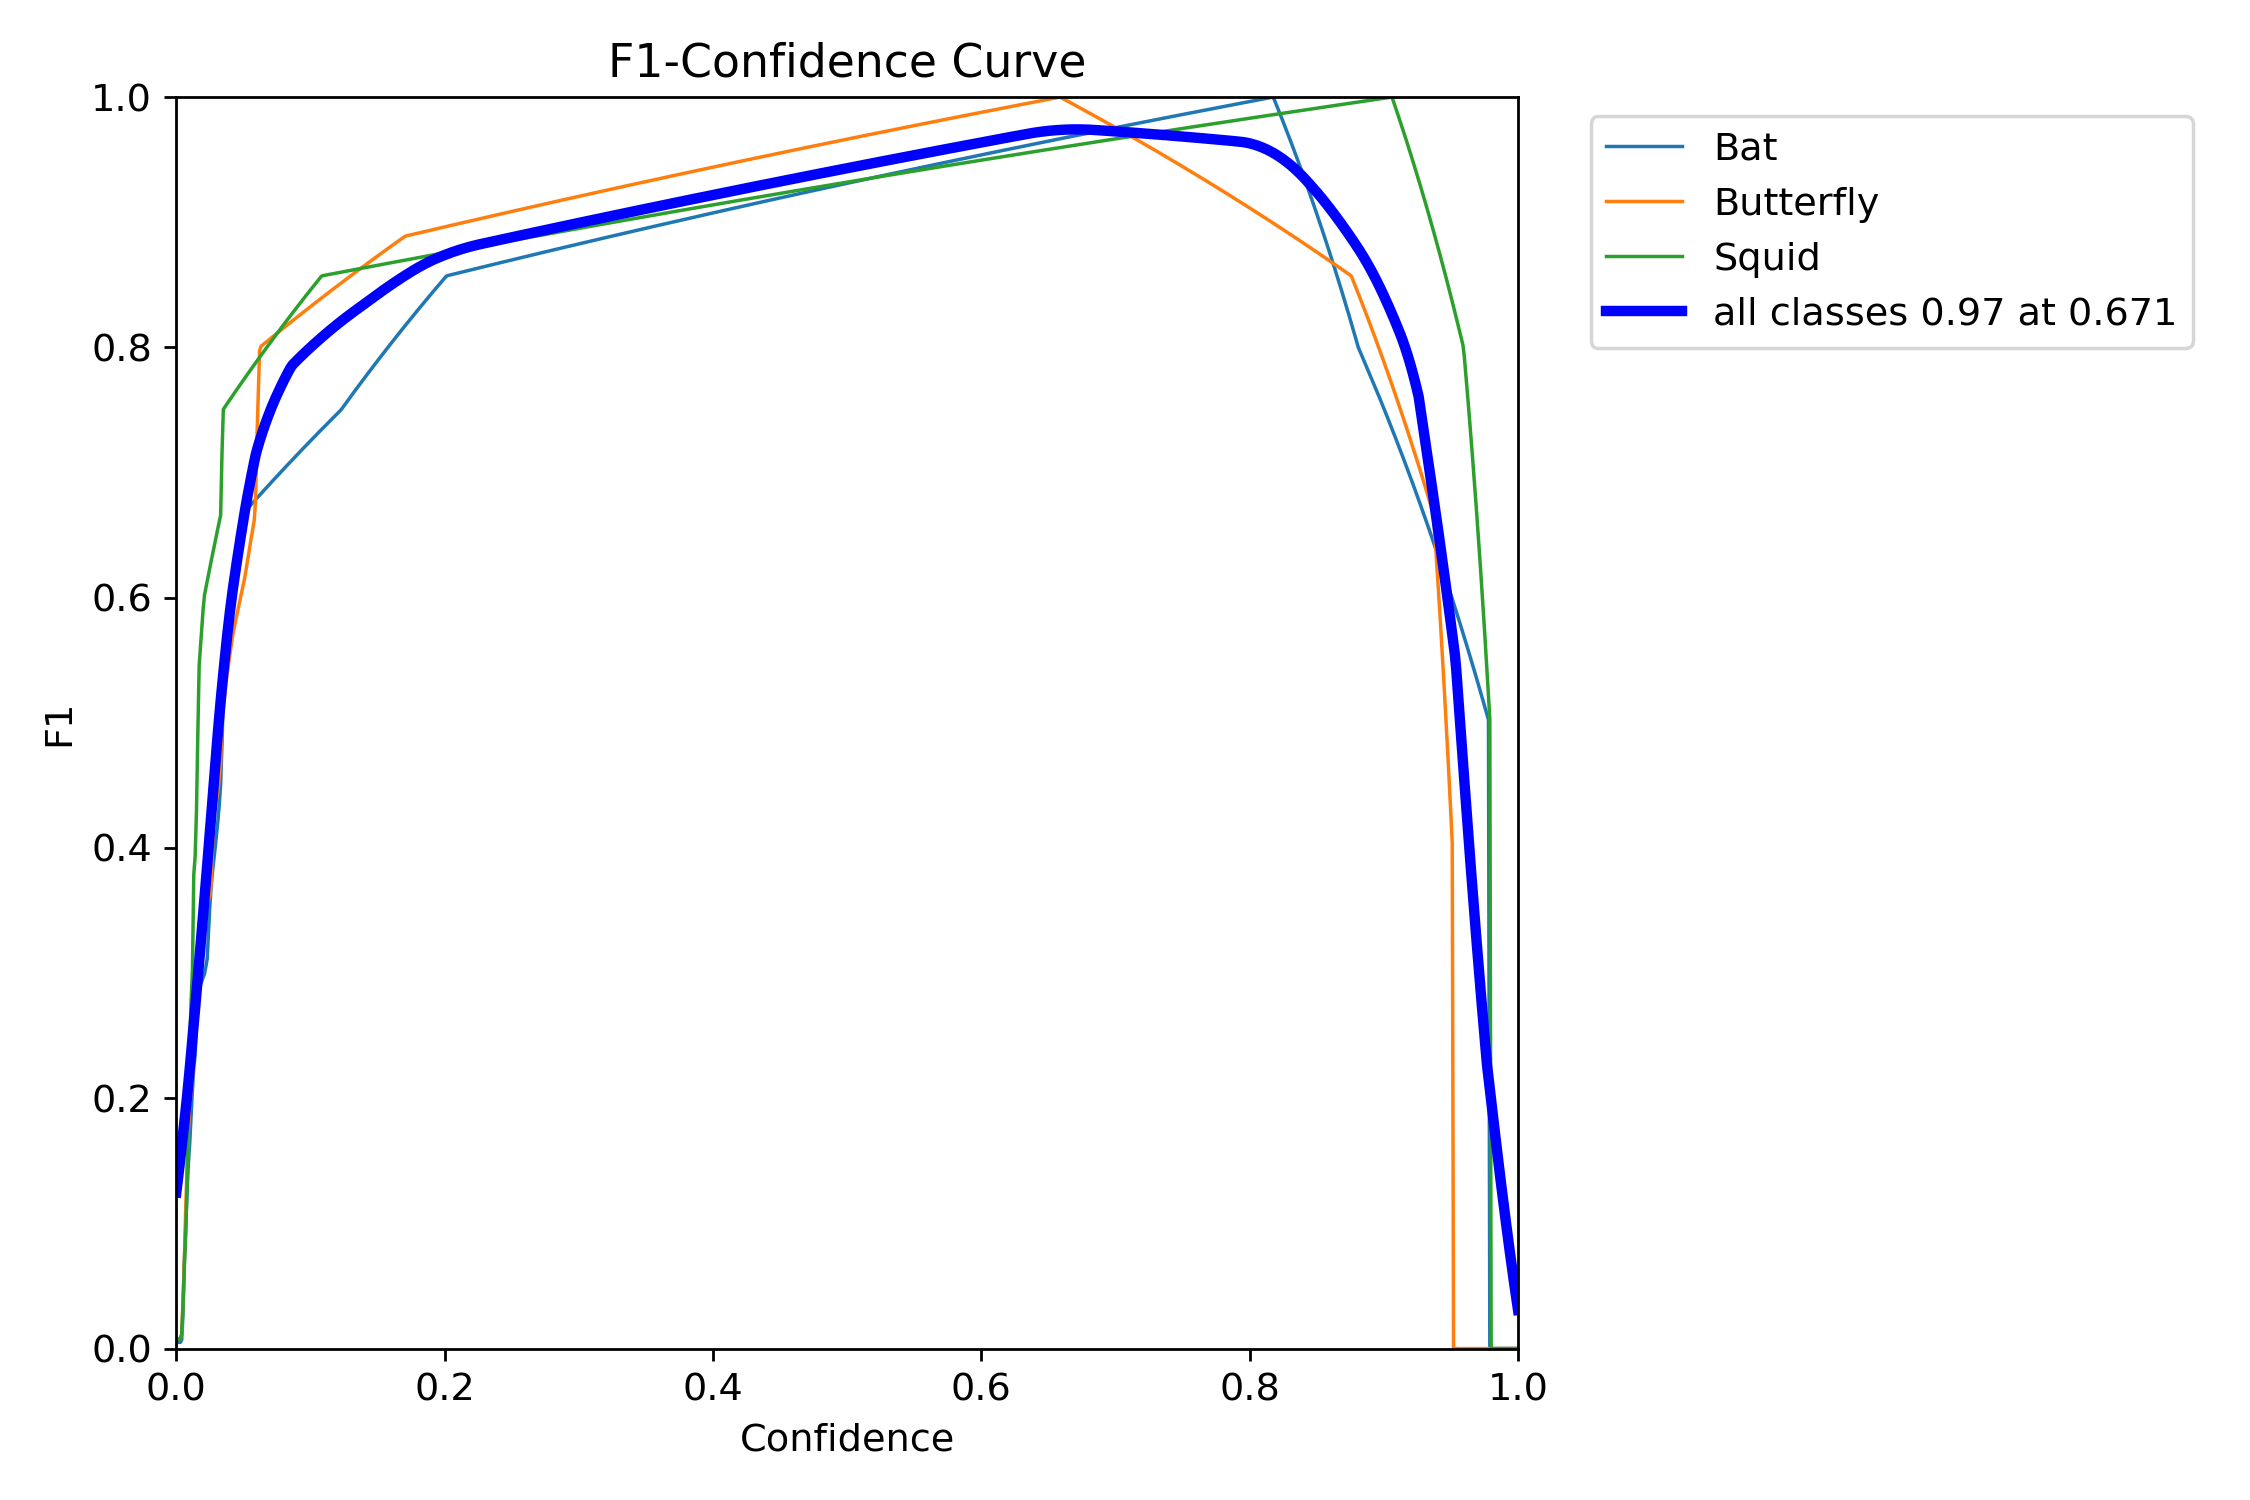

In [ ]:
# Loading the Trainign statistics
im(filename='runs/detect/train/F1_curve.png', width=600)

In [ ]:
def detect_objects(_model, image_path, conf):
    """
    This method will load the image and detect the object inside it.
    """
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)
    results = _model.predict(source=image_path, conf=conf)
    result = results[0]

    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    class_labels = ['Bat', 'Butterfly', 'Squid']

    print(bboxes, classes)
    title = []
    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str(class_labels[cls]), (x, y + 25), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    image2 = Image.fromarray(frame_rgb)
    plt.figure(figsize=(5,5))
    plt.imshow(image2)
    plt.show()


.DS_Store
01_jpg.rf.c8e5235634922823096ea135138c7d7f.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/01_jpg.rf.c8e5235634922823096ea135138c7d7f.jpg: 640x640 1 Butterfly, 382.5ms
Speed: 5.4ms preprocess, 382.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
[[ 81   0 364 382]] [1]


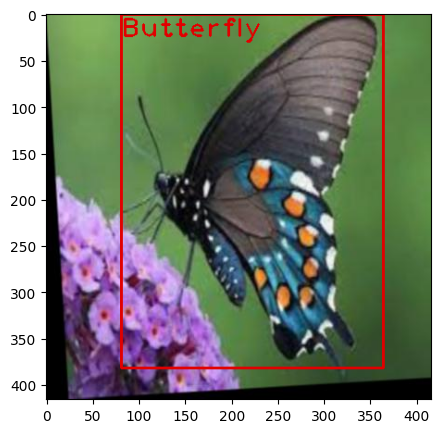

02_jpg.rf.d2830ef286eb4571acb72540cd1b41b9.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/02_jpg.rf.d2830ef286eb4571acb72540cd1b41b9.jpg: 640x640 1 Butterfly, 305.6ms
Speed: 4.8ms preprocess, 305.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
[[ 31  32 364 280]] [1]


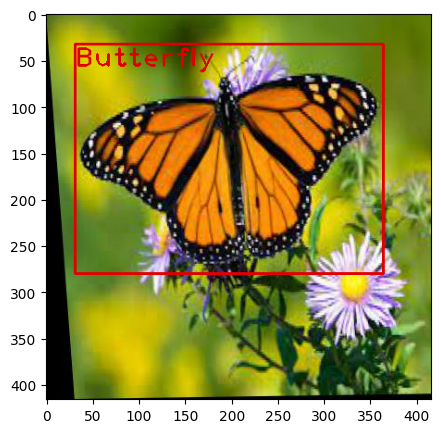

03_jpg.rf.daaf455c280f3e4c03f623dd456c3225.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/03_jpg.rf.daaf455c280f3e4c03f623dd456c3225.jpg: 640x640 1 Butterfly, 287.9ms
Speed: 4.6ms preprocess, 287.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
[[ 93  30 416 379]] [1]


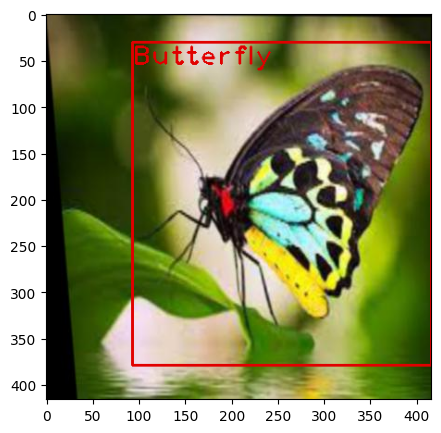

10_jpg.rf.ec08b8d806ae8958cba8fb3e0d8f7ca4.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/10_jpg.rf.ec08b8d806ae8958cba8fb3e0d8f7ca4.jpg: 640x640 1 Butterfly, 312.2ms
Speed: 4.5ms preprocess, 312.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
[[ 96  89 355 395]] [1]


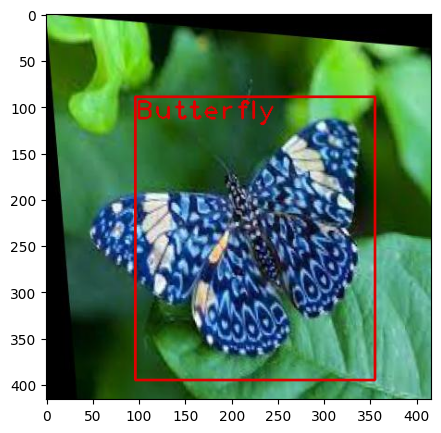

31_jpg.rf.ef5f6bedb9ffcb14a41887ebead5af0e.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/31_jpg.rf.ef5f6bedb9ffcb14a41887ebead5af0e.jpg: 640x640 1 Bat, 218.1ms
Speed: 5.1ms preprocess, 218.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
[[ 59  65 340 393]] [0]


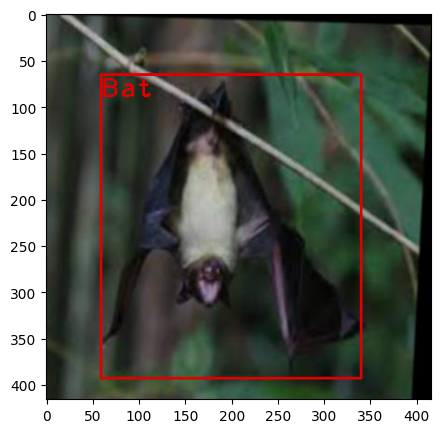

33_jpg.rf.eee27ca35a92325dfc7ffe902949d036.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/33_jpg.rf.eee27ca35a92325dfc7ffe902949d036.jpg: 640x640 1 Bat, 210.6ms
Speed: 4.5ms preprocess, 210.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
[[  9  21 286 416]] [0]


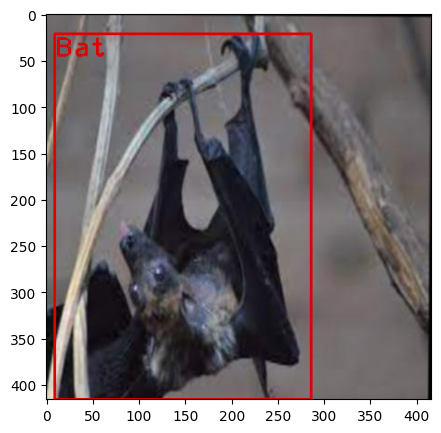

35_jpg.rf.b1716f5901bae2660166b50adbafcbcd.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/35_jpg.rf.b1716f5901bae2660166b50adbafcbcd.jpg: 640x640 1 Bat, 214.3ms
Speed: 4.6ms preprocess, 214.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
[[ 16   6 415 416]] [0]


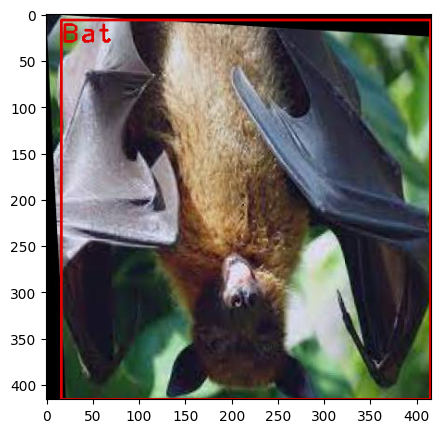

53_jpg.rf.b44f33562ad12e6b360039d8af663845.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/53_jpg.rf.b44f33562ad12e6b360039d8af663845.jpg: 640x640 1 Squid, 237.0ms
Speed: 4.8ms preprocess, 237.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
[[ 62  20 358 416]] [2]


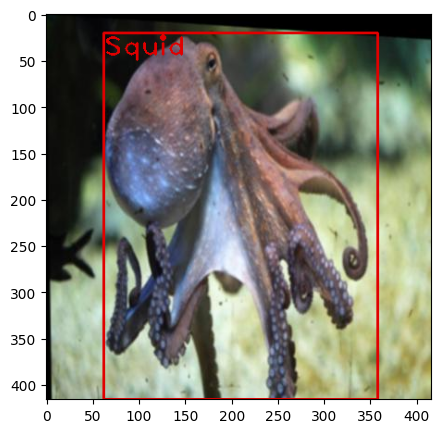

54_jpg.rf.d8bf72081286b342e575cdb0e0b468d7.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/54_jpg.rf.d8bf72081286b342e575cdb0e0b468d7.jpg: 640x640 1 Squid, 237.8ms
Speed: 4.7ms preprocess, 237.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
[[ 78  55 392 346]] [2]


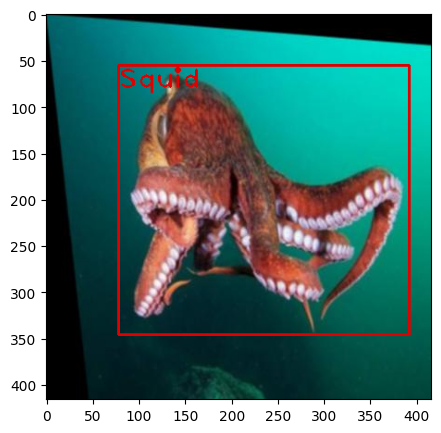

55_jpg.rf.063331fb62828cc15ec8b971641286bd.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/55_jpg.rf.063331fb62828cc15ec8b971641286bd.jpg: 640x640 1 Squid, 233.9ms
Speed: 5.7ms preprocess, 233.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
[[ 52   0 416 416]] [2]


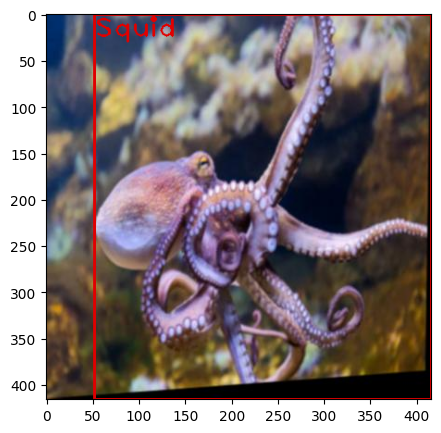

In [ ]:
"""
Showing the results from the valid datasets images, which are not present in the
train dataset. Took the example from different classes.
"""

for filename in sorted(os.listdir(f'{HOME}/butterfly-mix/datasets/valid/images/')):
    print(filename)
    if filename.startswith("."): continue
    detect_objects(new_model,
                   image_path = f'{HOME}/butterfly-mix/datasets/valid/images/{filename}',
                   conf = 0.7)